### 실습목표

#### 서울시 구별 CCTV 현황 분석
- pandas, matplotlib 사용하기
- 서울시 각 구별 CCTV 현황 살펴보기, 인구대비 CCTV 비율이 높은/낮은 지역 알아보기

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 서울시 구별 cctv 현황 데이터 불러오기 파일

In [10]:
cctv_seoul= pd.read_csv('CCTV_in_Seoul.csv')
cctv_seoul

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613
5,광진구,707,573,78,53,174
6,구로구,1561,1142,173,246,323
7,금천구,1015,674,51,269,354
8,노원구,1265,542,57,451,516
9,도봉구,485,238,159,42,386


In [11]:
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [12]:
cctv_seoul.tail(3)

,기관명,소계,2013년도 이전,2014년,2015년,2016년
22,종로구,1002,464,314,211,630
23,중구,671,413,190,72,348
24,중랑구,660,509,121,177,109


In [21]:
# 컬럼명 바꾸기(기관명 > 구)
cctv_seoul.rename(columns={'기관명' : '구'}, inplace= True) 

In [24]:
# 파일 형시때문에 컬럼에 해당하는 부분을 데이터로 인식함
pop_seoul =pd.read_excel('population_in_Seoul.xls', header=2, usecols='B,D,G,J,N')

# header : 읽고 싶은 row index
# usecols : 읽고 싶은 column 선택

In [25]:
pop_seoul.head(2)

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0


In [29]:
# 컬럼명 수정
pop_seoul.columns = ['구', '인구수', '한국인수', '외국인수', '65세이상고령자']

In [30]:
pop_seoul.head(2)

,구,인구수,한국인수,외국인수,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0


### 결측치 확인

In [32]:
cctv_seoul.info()
# 결측치 없다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   구          25 non-null     object
 1   소계         25 non-null     int64 
 2   2013년도 이전  25 non-null     int64 
 3   2014년      25 non-null     int64 
 4   2015년      25 non-null     int64 
 5   2016년      25 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB


In [34]:
pop_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구         26 non-null     object 
 1   인구수       26 non-null     float64
 2   한국인수      26 non-null     float64
 3   외국인수      26 non-null     float64
 4   65세이상고령자  26 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.2+ KB


In [38]:
# 결측치 확인
# 불리언(T/F) 인덱싱 : True에 해당하는 데이터만 가져오기
pop_seoul[pop_seoul['인구수'].isnull()]

,구,인구수,한국인수,외국인수,65세이상고령자
26,NaN,NaN,NaN,NaN,NaN


In [39]:
pop_seoul['인구수'].isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
Name: 인구수, dtype: bool

In [44]:
# 결측치 삭제
pop_seoul.drop(26, inplace=True)

In [45]:
pop_seoul

,구,인구수,한국인수,외국인수,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0


### cctv가 많거나 적은 지역 파악해보자(각각 5구씩)
- 많은 지역 5개

In [49]:
# ascending = True > 기본값
cctv_seoul.sort_values(by='소계', ascending=False)

,구,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398
6,구로구,1561,1142,173,246,323
4,관악구,1496,846,260,390,613
16,성북구,1464,1009,78,360,204
10,동대문구,1294,1070,23,198,579
8,노원구,1265,542,57,451,516


- 적은 지역 5개

In [50]:
cctv_seoul.sort_values(by='소계', ascending=False).tail()

,구,소계,2013년도 이전,2014년,2015년,2016년
23,중구,671,413,190,72,348
24,중랑구,660,509,121,177,109
17,송파구,618,529,21,68,463
12,마포구,574,314,118,169,379
9,도봉구,485,238,159,42,386


In [51]:
cctv_seoul.sort_values(by='소계').head()

,구,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [53]:
data_result = pd.merge(cctv_seoul, pop_seoul, on='구')

In [54]:
data_result.head(1)

,구,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인수,외국인수,65세이상고령자
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0


### 인구수대비 CCTV 비율이 높은/낮은 지역 알아보기
- 특성공학

In [57]:
data_result['인구대비 CCTV비율'] = (data_result['소계']/data_result['인구수'])*100

In [59]:
data_result.head(2)

,구,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인수,외국인수,65세이상고령자,인구대비 CCTV비율
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0,0.487292
1,강동구,773,379,99,155,377,453233.0,449019.0,4214.0,54622.0,0.170552


In [61]:
# 인구수 대비 CCTV가 많은 지역
data_result.sort_values(by='인구대비 CCTV비율')[['구', '인구대비 CCTV비율']]

,구,인구대비 CCTV비율
17,송파구,0.092587
9,도봉구,0.139110
3,강서구,0.146413
12,마포구,0.147312
24,중랑구,0.159227
1,강동구,0.170552
5,광진구,0.189970
8,노원구,0.222170
19,영등포구,0.224326
2,강북구,0.226535


In [65]:
# 한글 지원 폰트로 바꿔주기
from matplotlib import rc
rc('font', family='Malgun Gothic')

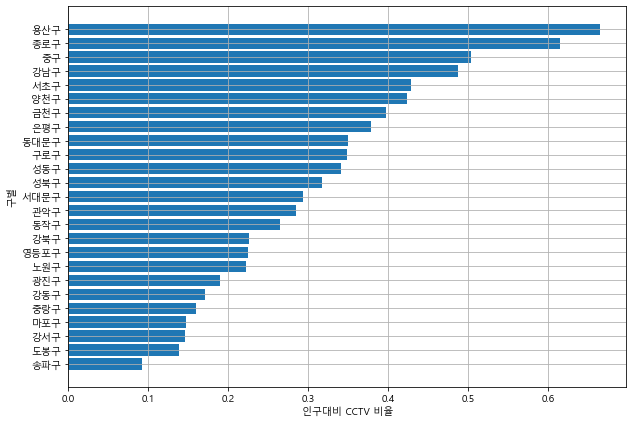

In [69]:
plt.figure(figsize=(10,7)) #(가로, 세로)
plt.barh(data_result.sort_values(by='인구대비 CCTV비율')['구'], 
        data_result.sort_values(by='인구대비 CCTV비율')['인구대비 CCTV비율'])
plt.xlabel('인구대비 CCTV 비율')
plt.ylabel('구별')
plt.grid()
plt.show()

In [70]:
# 구 컬럼을 인덱스로 설정
data_result.set_index('구', inplace=True)
data_result.head(1)

,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인수,외국인수,65세이상고령자,인구대비 CCTV비율
구,,,,,,,,,,
강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0,0.487292


In [71]:
# 상관계수
data_result.corr()
# cctv 숫자와 관련된 컬럼이 뭘까?

,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인수,외국인수,65세이상고령자,인구대비 CCTV비율
소계,1.000000,0.862756,0.450062,0.624402,0.593398,0.306342,0.304287,-0.023786,0.255196,0.575784
2013년도 이전,0.862756,1.000000,0.121888,0.257748,0.355482,0.168177,0.163142,0.048973,0.105379,0.577185
2014년,0.450062,0.121888,1.000000,0.312842,0.415387,0.027040,0.025005,0.027325,0.010233,0.399458
2015년,0.624402,0.257748,0.312842,1.000000,0.513767,0.368912,0.363796,0.013301,0.372789,0.207860
2016년,0.593398,0.355482,0.415387,0.513767,1.000000,0.144959,0.145966,-0.042688,0.065784,0.438115
인구수,0.306342,0.168177,0.027040,0.368912,0.144959,1.000000,0.998061,-0.153371,0.932667,-0.514143
한국인수,0.304287,0.163142,0.025005,0.363796,0.145966,0.998061,1.000000,-0.214576,0.931636,-0.513169
외국인수,-0.023786,0.048973,0.027325,0.013301,-0.042688,-0.153371,-0.214576,1.000000,-0.155381,0.079211
65세이상고령자,0.255196,0.105379,0.010233,0.372789,0.065784,0.932667,0.931636,-0.155381,1.000000,-0.541024
인구대비 CCTV비율,0.575784,0.577185,0.399458,0.207860,0.438115,-0.514143,-0.513169,0.079211,-0.541024,1.000000


In [72]:
data_result.corr()['소계']

소계             1.000000
2013년도 이전      0.862756
2014년          0.450062
2015년          0.624402
2016년          0.593398
인구수            0.306342
한국인수           0.304287
외국인수          -0.023786
65세이상고령자       0.255196
인구대비 CCTV비율    0.575784
Name: 소계, dtype: float64